## 解析するスピン画像ファイルの選択

In [1]:
directory_name = "skate_2017fs_spi"
#directory_name = "skate_2012_spi3"
#directory_name = "skate_2014gpf"


In [2]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt

import copy
from scipy.stats import zscore

import os
import re

h = 0
w = 1

def json_files_open(directory_name):
    
    # 画像からサイズを取り出す
    def get_image_size(img_name):
        img_ = cv2.imread(img_name)
        return np.delete(np.array(img_.shape), 2)

    # targetの決定とkptの取り出し(reshape済)
    def take_out_kpt(data, img_size):

        #print("人数:"+str(len(data["people"])))

        x = [] 
        y = []

        x_mean = []
        y_mean = []
        kpt_num = []

        for people in data['people']:
            kpt = np.array(people['pose_keypoints']).reshape((18, 3))

            #x,yに分ける
            for i in range(18):
                if (kpt[i,2] != 0): #and (kpt[i,0] != 0) and (kpt[i,1] != 0):
                    x = np.append(x,kpt[i,0])
                    y = np.append(y,kpt[i,1])

            #print("kpt_num:"+str(len(x)))
            
            #keypointの数、x,y座標の平均値（中央を原点とした、）
            kpt_num = np.append(kpt_num, len(x))
            x_mean = np.append(x_mean, np.mean(x - img_size[w] / 2))
            y_mean = np.append(y_mean, np.mean(y - img_size[h] / 2))

#         print("------")    
#         print(kpt_num)    
        #人の情報(x,y座標)を集約
        people_info = np.append(x_mean,y_mean).reshape(2,-1)
#         print("people_info:" )
#         print(people_info)
#         print("kpt_nums:"+str(kpt_num))
#         print("xms:"+str(x_mean))
#         print("yms:"+str(y_mean))
#         print("xy_argmins:"+str(np.argmin(np.absolute(people_info),axis=1))) #絶対値の最小値
#         print(people_info.shape)


        #絶対値の最小値をとる要素番号を導出
        xy_argmin = np.argmin(np.absolute(people_info),axis=1)
        #print("xy_argmin + kpt_num_argmax:" + str(np.append(xy_argmin, np.argmax(kpt_num))))

        #keypointの数、x,y座標の平均値を比較し、最も多い人の要素番号を導出
        target_index = np.argmax(np.bincount(np.append(xy_argmin, np.argmax(kpt_num))))
        #print("bincount:" + str(np.bincount(np.append(xy_argmin, np.argmax(kpt_num))))) #np.append()の出現回数を出力
        #print("target_index:" + str(target_index))

        #targetの情報取り出し
        people_data = data["people"]
        #print(people_data)
        target = people_data[target_index]
        #print(target)
        target_kpt = np.array(target["pose_keypoints"]).reshape(18,3)
        #print(target_kpt)

        return target_kpt

    
    # 標準化
    def conv_kpt_zscore(kpt):
        #kpt_zscore = []
        x = [] 
        y = []

        for i in range(18):
            if kpt[i,2] != 0:
                x = np.append(x,kpt[i,0])
                y = np.append(y,kpt[i,1])

        x_zscore = zscore(x)
        y_zscore = zscore(y)

        j = 0
        for i in range(18):
            if(kpt[i,2]) != 0:
                kpt[i,0] = copy.copy(x_zscore[j])
                kpt[i,1] = copy.copy(y_zscore[j])
                j += 1

    _json = re.compile("json")
    _png = re.compile("png")

    all_frame_kpt = []
    succese_file_names = []

    directory = os.listdir(directory_name)

    # ディレクトリの移動
    os.chdir(directory_name)

    # 画像サイズの取り出し
    for file in directory:
        if _png.search(file):
            try:
                img_size = get_image_size(file)
                print(file+"\t:get_image_size success")
                break
            except:
                print(file+"\t:get_image_size failed")

    # jsonファイルオープンとデータ取出し
    n = 0
    m = 0
    for file in directory:
        if _json.search(file):
            try:
                with open(file, 'r') as f2:
                    data = json.load(f2)

                #ここでデータ取出し、標準化する
                kpt = take_out_kpt(data, img_size)
                conv_kpt_zscore(kpt)
                all_frame_kpt = np.append(all_frame_kpt,kpt)
                succese_file_names = np.append(succese_file_names, file)
                
                print(file+"\t:success")
                n += 1

            except:
                print(file+"\t:failed")
                m += 1

    print("successファイル数: "+ str(n))
    print("failedファイル数: "+ str(m))
    os.chdir("../")
    
    return all_frame_kpt, succese_file_names


In [3]:
akr, file_names = json_files_open(directory_name)

image0001_rendered.png	:get_image_size success
image0001_keypoints.json	:success
image0002_keypoints.json	:success
image0003_keypoints.json	:success
image0004_keypoints.json	:success
image0005_keypoints.json	:success
image0006_keypoints.json	:success
image0007_keypoints.json	:success
image0008_keypoints.json	:success
image0009_keypoints.json	:success
image0010_keypoints.json	:success
image0011_keypoints.json	:success
image0012_keypoints.json	:success
image0013_keypoints.json	:success
image0014_keypoints.json	:success
image0015_keypoints.json	:success
image0016_keypoints.json	:success
image0017_keypoints.json	:success
image0018_keypoints.json	:success
image0019_keypoints.json	:success
image0020_keypoints.json	:success
image0021_keypoints.json	:success
image0022_keypoints.json	:success
image0023_keypoints.json	:success
image0024_keypoints.json	:success
image0025_keypoints.json	:success
image0026_keypoints.json	:success
image0027_keypoints.json	:success
image0028_keypoints.json	:success
i

## グラフ描画(足のx座標の変化)

In [4]:
#pose_keypointにおける10番目(RightAnkle)と13番目(LeftAnkle)のx座標の配列の初期化

#{ファイル数,18(体部分),3(x座標、y座標,信頼度)}になるよう整形
akr = akr.reshape(-1,18,3)

kp_x = []

for i in range(len(akr)):
    if akr[i, 10, 0] != 0 and akr[i, 13, 0] != 0: #両方とも0が出力されている場合は除く
        if abs(akr[i, 10, 0]) > abs(akr[i, 13, 0]):  #体部分x座標の絶対値の大きい方
            kp_x = np.append(kp_x, akr[i, 10, 0])
        elif abs(akr[i, 13, 0]) > abs(akr[i, 10, 0]):#体部分x座標の絶対値の大きい方
            #kp_x.append(akr[i, 13, 0])
            kp_x = np.append(kp_x, akr[i, 13, 0])
        else:                                        
            continue

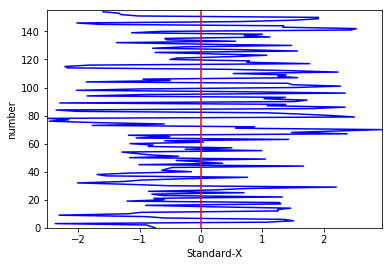

In [5]:
x = kp_x
y = np.arange(0, len(kp_x), 1)

plt.xlim(min(kp_x), max(kp_x)) # x軸の範囲を限定
plt.ylim(0, len(kp_x))         # y軸の範囲を限定
plt.plot(x, y, 'b')            # グラフ描画
plt.plot([0,0], [0, len(kp_x)], 'r')   #中央軸

plt.xlabel("Standard-X")     #標準化されたx座標   
plt.ylabel("number")         #画像何枚目か

plt.show()

### スピンの回転数

In [6]:
n = 0 #回転数の初期化
i = 1
for i in range(len(akr)):
    
    #x座標の前後で両方とも正か両方とも負の場合　すなわち、中央軸と重なる点がない場合
    if ((akr[i - 1, 10, 0]) > 0 and (akr[i, 10, 0]) > 0) or ((akr[i - 1, 10, 0]) < 0 and (akr[i, 10, 0]) < 0):
        continue
    
    #x座標の前後で片方が正、もう片方が負の場合　すなわち、中央軸と重なる点がある場合
    else:
        n +=1

        
print("回転数:" + str(n/2))  #中央軸と重なった回数/2 = 回転数

回転数:49.0


## グラフ描画(足のy座標の変化)

In [7]:
#pose_keypointにおける10番目(RightAnkle)と13番目(LeftAnkle)のy座標の配列の初期化

kp_y = []
for i in range(len(akr)):
    if akr[i, 10, 1] != 0 and akr[i, 13, 1] != 0: #0が出力されている場合は除く
        if akr[i, 10, 1] < akr[i, 13, 1]:  #足部分y座標の小さい方 = 足が上がっている方
            kp_y = np.append(kp_y, akr[i, 10, 1])
        elif akr[i, 13, 1] < akr[i, 10, 1]:#足部分y座標の小さい方 = 足が上がっている方
            kp_y = np.append(kp_y, akr[i, 13, 1])
        else:
            continue

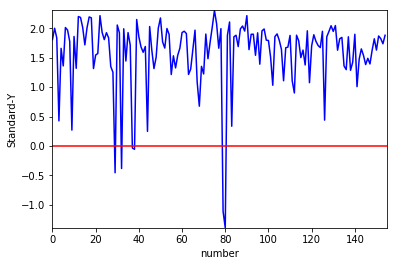

In [8]:
x = np.arange(0, len(kp_y), 1) # x軸(時系列)を設定
y = kp_y                       # y軸(足のy座標)を設定

plt.xlim(0, len(kp_y))        
plt.ylim(min(kp_y), max(kp_y)) 
plt.plot(x, y, 'b')                   #グラフ描画 色はblue
plt.plot([0, len(kp_y)],[0,0], 'r')   #中央軸

plt.xlabel("number")        #画像何枚目か
plt.ylabel("Standard-Y")    #標準化されたy座標
plt.show()

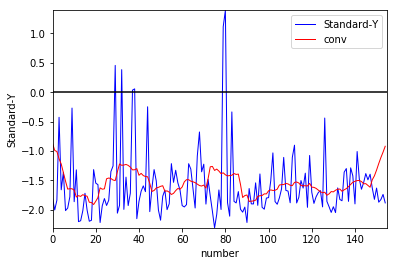

In [9]:
x = np.arange(0, len(kp_y), 1) # x軸(時系列)を設定
y1 = -kp_y                      # y軸(足のy座標)を設定 画像の動きと合わせるため、yの値を反転
v = np.ones(15)/15.0           # 移動平均をとるための配列vを設定。今回は前後10個の値を用いて平均をとる。
y2 = np.convolve(y1, v, mode='same')

plt.xlim(0, len(y1))        
plt.ylim(min(y1), max(y1))
plt.plot(x, y1,'b', linewidth=1, label = "Standard-Y")
plt.plot(x, y2,'r', linewidth=1, label = "conv")
plt.plot([0, len(kp_y)], [0, 0], 'k')   # 移動平均の中央軸
plt.legend()
plt.xlabel("number")      # 画像何枚目か
plt.ylabel("Standard-Y")  # 標準化されたy座標
plt.show()

## グラフ描画(首のy座標の変化)

In [10]:
#pose_keypointにおける1番目(Neck)のy座標の配列の初期化

kp_y = []
for i in range(len(akr)):
    if akr[i, 1, 1] != 0: #0が出力されている場合は除く
            kp_y = np.append(kp_y, akr[i, 1, 1])
    else:
        continue

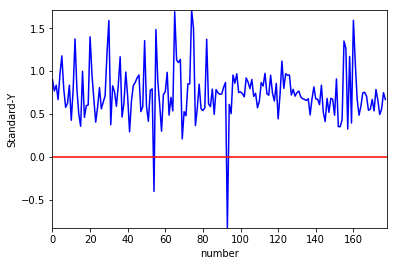

In [11]:
x = np.arange(0, len(kp_y), 1) # x軸(時系列)を設定
y = -kp_y                       # y軸(首のy座標)を設定 画像の動きと合わせるため、yの値を反転

plt.xlim(0, len(y))        
plt.ylim(min(y), max(y)) 
plt.plot(x, y, 'b')                   #グラフ描画
plt.plot([0, len(kp_y)],[0,0], 'r')   #中央軸

plt.xlabel("number")        #画像何枚目か
plt.ylabel("Standard-Y")    #標準化されたy座標
plt.show()

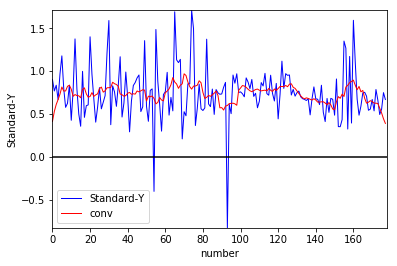

In [12]:
x = np.arange(0, len(kp_y), 1)  # x軸(時系列)を設定
y1 = -kp_y                      # y軸(足のy座標)を設定 画像の動き合わせるため、yの値を反転
v = np.ones(10)/10.0            # 移動平均をとるための配列vを設定
y2 = np.convolve(y1, v, mode='same')

plt.xlim(0, len(y1))        
plt.ylim(min(y1), max(y1))
plt.plot(x, y1,'b', linewidth=1, label = "Standard-Y")
plt.plot(x, y2,'r', linewidth=1, label = "conv")
plt.plot([0, len(kp_y)], [0, 0], 'k')   # 中央軸
plt.legend()
plt.xlabel("number")      # 画像何枚目か
plt.ylabel("Standard-Y")    # 標準化されたy座標
plt.show()

### 複数のグラフの描画

In [13]:
#pose_keypointにおける1番目(Neck)と10番目(RightAnkle)と13番目(LeftAnkle)のy座標の配列の初期化
kp_x_n = [] # 首のx座標を入れる配列
kp_y_n = [] # 首のy座標を入れる配列
kp_y = []   # 足のy座標を入れる配列

kp_fnames = []

for i in range(len(akr)):
    if (akr[i, 10, 1] != 0 and akr[i, 13, 1] != 0 and akr[i, 1, 1] != 0): #0が出力されている場合は除く
        kp_y_n = np.append(kp_y_n, akr[i, 1, 1])
        kp_x_n = np.append(kp_x_n, akr[i, 1, 0])
        
        kp_fnames = np.append(kp_fnames, file_names[i])
            
        if (akr[i, 10, 1] < akr[i, 13, 1]):  #y座標の小さい方
            kp_y = np.append(kp_y, akr[i, 10, 1])
            
        elif (akr[i, 13, 1] < akr[i, 10, 1]):#y座標の小さい方
            kp_y = np.append(kp_y, akr[i, 13, 1])
            
        else:
            continue

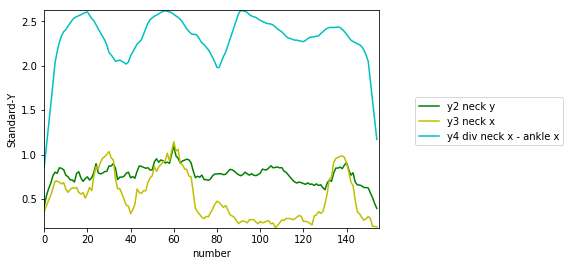

In [14]:
x = np.arange(0, len(kp_y), 1) # x軸(時系列)を設定
y = kp_y                       # y軸(足のy座標)を設定
y2 = kp_y_n                    # y軸(首のy座標)
y3 = abs(kp_x_n)               # y軸(首のx座標の絶対値)

v = np.ones(10)/10.0                  # 移動平均をとるための配列vを設定
y = np.convolve(y, v, mode='same')    # 足のy座標の移動平均

y2 = np.convolve(y2, v, mode='same')  # 首のy座標の移動平均

y3 = np.convolve(y3, v, mode='same')  # 首のx座標の移動平均

y4 = -y2 + y
y4 = np.convolve(y4, v, mode='same')

minimum = (min(-y2), min(y3), min(y4))
maximum = (max(-y2), max(y3), max(y4))
plt.xlim(0, len(kp_y))        
plt.ylim(min(minimum), max(maximum)) 

plt.plot(x, -y2, 'g', label = "y2 neck y") 
plt.plot(x, y3, 'y', label = "y3 neck x")
plt.plot(x, y4, 'c', label = "y4 div neck x - ankle x")
plt.plot([0, len(kp_y)], [0,0], 'r', lw = 0.5)  

plt.xlabel("number")        # 画像何枚目か
plt.ylabel("Standard-Y")    # 標準化されたy座標
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 0.5, 0.5, .100), borderaxespad=0.,) #凡例をグラフ外に表示

plt.show()

In [15]:
spin = []

for i in range(len(y4)):
    if (y3[i] < min(y3) + 0.25) :
        print("%d\t%s\tシットスピン"%(i,kp_fnames[i]))
        spin = np.append(spin, 1)
        
    elif y4[i] < min(y4) + 1.0:
        if y3[i] > 0.5:
            print("%d\t%s\tキャメルスピン"%(i,kp_fnames[i]))
            spin = np.append(spin, 2)
        
        else:
            print("%d\t%s\tビールマンスピン"%(i,kp_fnames[i]))
            spin = np.append(spin, 3)
        
    else:
        print("%d\t%s"%(i,kp_fnames[i]))
        spin = np.append(spin, 0)
        

0	image0001_keypoints.json	シットスピン
1	image0002_keypoints.json	シットスピン
2	image0003_keypoints.json	ビールマンスピン
3	image0004_keypoints.json	キャメルスピン
4	image0005_keypoints.json	キャメルスピン
5	image0006_keypoints.json
6	image0007_keypoints.json
7	image0009_keypoints.json
8	image0010_keypoints.json
9	image0011_keypoints.json
10	image0012_keypoints.json
11	image0013_keypoints.json
12	image0014_keypoints.json
13	image0015_keypoints.json
14	image0016_keypoints.json
15	image0017_keypoints.json
16	image0018_keypoints.json
17	image0019_keypoints.json
18	image0020_keypoints.json
19	image0021_keypoints.json
20	image0022_keypoints.json
21	image0023_keypoints.json
22	image0024_keypoints.json
23	image0026_keypoints.json
24	image0027_keypoints.json
25	image0028_keypoints.json
26	image0030_keypoints.json
27	image0031_keypoints.json
28	image0032_keypoints.json
29	image0033_keypoints.json
30	image0035_keypoints.json
31	image0036_keypoints.json
32	image0037_keypoints.json
33	image0038_keypoints.json
34	image0039_keypoi

In [16]:
start_spin_type = 0
name = 0
start_fname = 0

for i in range(len(spin)):
    if spin[i] != start_spin_type:
        if name != 0:
            print("%s ～ %s %s"%(start_fname, kp_fnames[i-1], name))
        start_fname = kp_fnames[i]
        
        if spin[i] == 0:
            start_spin_type = 0
            name = 0
            
        
        elif spin[i] == 1:
            start_spin_type = 1
            name = "シットスピン"

        elif spin[i] == 2:
            start_spin_type = 2
            name = "キャメルスピン"

        elif spin[i] == 3:
            start_spin_type = 3
            name = "ビールマンスピン"
         
    if (i == (len(spin)-1)) and (start_spin_type != 0):
        print("%s ～ %s %s"%(start_fname, kp_fnames[i], name))
        
        

image0001_keypoints.json ～ image0002_keypoints.json シットスピン
image0003_keypoints.json ～ image0003_keypoints.json ビールマンスピン
image0004_keypoints.json ～ image0005_keypoints.json キャメルスピン
image0045_keypoints.json ～ image0047_keypoints.json シットスピン
image0092_keypoints.json ～ image0100_keypoints.json シットスピン
image0106_keypoints.json ～ image0106_keypoints.json シットスピン
image0109_keypoints.json ～ image0156_keypoints.json シットスピン
image0183_keypoints.json ～ image0192_keypoints.json シットスピン


In [17]:
#スピン軸足の膝(Knee)と尻(Hip)の初期化

#{ファイル数,18(体部分),3(x座標、y座標,信頼度)}になるよう整形
akr = akr.reshape(-1,18,3)

kp_x_min = []

kp_x_a = []
kp_y_a = []

kp_x_n = []
kp_y_n = []

kp_y_hip = []
kp_y_knee = []

kp_y_hip_a = []
kp_y_knee_a = []


for i in range(len(akr)):
    #print(akr[i, 10, 0])
    if akr[i, 10, 0] != 0 and akr[i, 13, 0] != 0 and akr[i, 1, 0] != 0: #両方とも0が出力されている場合は除く
        kp_x_n = np.append(kp_x_n, akr[i, 1, 0])
        kp_y_n = np.append(kp_y_n, akr[i, 1, 1])
        
        if abs(akr[i, 10, 0]) > abs(akr[i, 13, 0]):  #足部分x座標の絶対値の大きい方
            kp_x_min = np.append(kp_x_min, akr[i, 10, 0])
            
            #軸足じゃない方の尻、膝のy座標
            kp_y_hip = np.append(kp_y_hip, akr[i, 8, 1])
            kp_y_knee = np.append(kp_y_knee, akr[i, 9, 1])
            
            #軸足の尻、膝のy座標
            kp_y_hip_a = np.append(kp_y_hip_a, akr[i, 11, 1])
            kp_y_knee_a = np.append(kp_y_knee_a, akr[i, 12, 1])
            
            kp_x_a = np.append(kp_x_a, akr[i, 13, 0])
            
        elif abs(akr[i, 13, 0]) > abs(akr[i, 10, 0]):#足部分x座標の絶対値の大きい方
            #kp_x_min.append(akr[i, 13, 0])
            kp_x_min = np.append(kp_x_min, akr[i, 13, 0])
            
            #軸足じゃない方の尻、膝のy座標
            kp_y_hip = np.append(kp_y_hip, akr[i, 11, 1])
            kp_y_knee = np.append(kp_y_knee, akr[i, 12, 1])
            
            #軸足の尻、膝のy座標
            kp_y_hip_a = np.append(kp_y_hip_a, akr[i, 8, 1])
            kp_y_knee_a = np.append(kp_y_knee_a, akr[i, 9, 1])

            kp_x_a = np.append(kp_x_a, akr[i, 10, 0])

            
        else:                                        
            continue

In [25]:
div_hip_knee_a = -(kp_y_hip_a - kp_y_knee_a)
div_hip_knee = -(kp_y_hip - kp_y_knee)
div_neck_hip = -(kp_y_n - kp_y_hip)

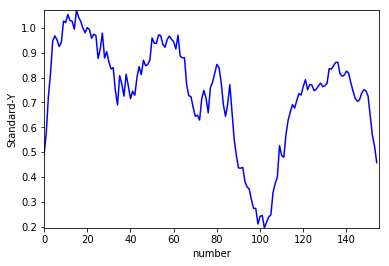

In [26]:
y2 = div_hip_knee_a                # y軸(足のy座標)を設定
y2 = np.convolve(y, v, mode='same')
x = np.arange(0, len(y), 1) # x軸(時系列)を設定
v = np.ones(10)/10.0        # 移動平均をとるための配列vを設定

plt.xlim(0, len(y))        
plt.ylim(min(y), max(y)) 
plt.plot(x, y, 'b')                   
plt.plot([0, len(kp_y)],[0,0], 'r')   

plt.xlabel("number")      #画像何枚目か
plt.ylabel("Standard-Y")  #標準化されたy座標
plt.show()

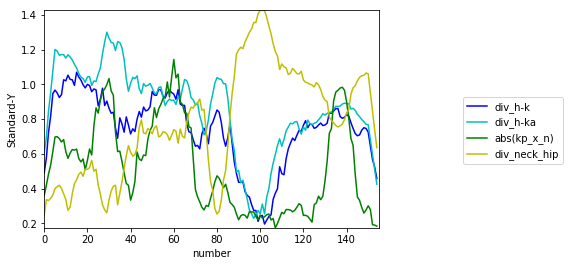

In [27]:
x = np.arange(0, len(y), 1) # x軸(時系列)を設定
v = np.ones(10)/10.0        # 移動平均をとるための配列vを設定

y = div_hip_knee                 # y軸(足のy座標)を設定
y = np.convolve(y, v, mode='same')

y2 = div_hip_knee_a                # y軸(足のy座標)を設定
y2 = np.convolve(y2, v, mode='same')

y3 = abs(kp_x_n)
y3 = np.convolve(y3, v, mode='same')

y5 = div_neck_hip
y5 = np.convolve(y5, v, mode='same')



minimum = (min(y), min(y2), min(y3), min(y5))
maximum = (max(y), max(y2), max(y3), max(y5))
plt.xlim(0, len(y))        
plt.ylim(min(minimum), max(maximum)) 
plt.plot(x, y, 'b' , label = "div_h-k")                   
plt.plot(x, y2, 'c', label = "div_h-ka")                  
plt.plot(x, y3, 'g', label = "abs(kp_x_n)")                  
plt.plot(x, y5, 'y', label = "div_neck_hip")                  
plt.plot([0, len(y)],[0,0], 'r')   

plt.xlabel("number")        # 画像何枚目か
plt.ylabel("Standard-Y")    # 標準化されたy座標
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 0.5, 0.5, .100), borderaxespad=0.,) #凡例をグラフ外に表示
plt.show()

In [28]:
spin = []

for i in range(len(y4)):
    if y2[i] < 0.2:
        print("%d\t%s\tシットスピン"%(i,kp_fnames[i]))
        spin = np.append(spin, 1)
        
    #print("%d キャメル　ビールズマン"%(i))
    elif y3[i] > np.median(y3) and y5[i] < np.median(y5) :
        print("%d\t%s\tキャメルスピン"%(i,kp_fnames[i]))
        spin = np.append(spin, 2)

    else:
        print("%d\t%s\tアップライトスピン"%(i,kp_fnames[i]))
        spin = np.append(spin, 3)

    """
    else:
        print("%d\t%s"%(i,kp_fnames[i]))
        spin = np.append(spin, 0)
    """ 
        

0	image0001_keypoints.json	アップライトスピン
1	image0002_keypoints.json	アップライトスピン
2	image0003_keypoints.json	キャメルスピン
3	image0004_keypoints.json	キャメルスピン
4	image0005_keypoints.json	キャメルスピン
5	image0006_keypoints.json	キャメルスピン
6	image0007_keypoints.json	キャメルスピン
7	image0009_keypoints.json	キャメルスピン
8	image0010_keypoints.json	キャメルスピン
9	image0011_keypoints.json	キャメルスピン
10	image0012_keypoints.json	キャメルスピン
11	image0013_keypoints.json	キャメルスピン
12	image0014_keypoints.json	キャメルスピン
13	image0015_keypoints.json	キャメルスピン
14	image0016_keypoints.json	キャメルスピン
15	image0017_keypoints.json	キャメルスピン
16	image0018_keypoints.json	キャメルスピン
17	image0019_keypoints.json	キャメルスピン
18	image0020_keypoints.json	キャメルスピン
19	image0021_keypoints.json	キャメルスピン
20	image0022_keypoints.json	キャメルスピン
21	image0023_keypoints.json	キャメルスピン
22	image0024_keypoints.json	キャメルスピン
23	image0026_keypoints.json	キャメルスピン
24	image0027_keypoints.json	キャメルスピン
25	image0028_keypoints.json	キャメルスピン
26	image0030_keypoints.json	キャメルスピン
27	image0031_keypoints.json	キャメルスピ